In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
Image_size=450
Image_size1=600
Batch_size=32
Channels=3
EPOCHS=50


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "MINIPROJECT",
    shuffle=True,
    image_size=(Image_size,Image_size1),
    batch_size=Batch_size
                                                    
)

Found 618 files belonging to 3 classes.


In [4]:
#this will give the names of the class
class_names=dataset.class_names
class_names

['Aloevera', 'Aloevera leaf', 'Tulsi leaves']

In [5]:
len(dataset)

20

In [6]:
# As it is giving the answer as the 24
# we have written the batch size=32
# 24*32=764

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 450, 600, 3)
[2 1 1 1 1 0 2 1 0 1 2 0 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 1]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
    

tf.Tensor(
[[[129. 125. 126.]
  [132. 128. 129.]
  [135. 133. 134.]
  ...
  [147. 144. 135.]
  [149. 146. 137.]
  [148. 145. 136.]]

 [[131. 127. 128.]
  [131. 127. 128.]
  [129. 127. 128.]
  ...
  [149. 146. 137.]
  [151. 148. 139.]
  [149. 146. 137.]]

 [[135. 131. 132.]
  [134. 130. 131.]
  [126. 124. 125.]
  ...
  [152. 148. 139.]
  [153. 149. 140.]
  [152. 148. 139.]]

 ...

 [[141. 140. 138.]
  [144. 143. 141.]
  [143. 139. 138.]
  ...
  [135. 132. 123.]
  [136. 133. 124.]
  [137. 134. 125.]]

 [[148. 147. 143.]
  [144. 143. 139.]
  [142. 138. 135.]
  ...
  [137. 133. 124.]
  [140. 136. 125.]
  [140. 136. 125.]]

 [[148. 147. 143.]
  [144. 143. 139.]
  [142. 138. 135.]
  ...
  [137. 133. 124.]
  [140. 136. 125.]
  [140. 136. 125.]]], shape=(450, 600, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[215. 198. 182.]
  [212. 195. 179.]
  [206. 189. 173.]
  ...
  [167. 149. 137.]
  [178. 159. 145.]
  [152. 133. 119.]]

 [[218. 201. 185.]
  [213. 196. 180.]
  [207. 190. 174.]
  ...
  [175. 157. 145.]
  [176. 157. 143.]
  [145. 126. 112.]]

 [[217. 200. 184.]
  [210. 193. 177.]
  [203. 186. 170.]
  ...
  [162. 144. 132.]
  [155. 136. 122.]
  [130. 111.  97.]]

 ...

 [[186. 167. 150.]
  [183. 164. 147.]
  [186. 167. 150.]
  ...
  [206. 184. 170.]
  [174. 152. 138.]
  [136. 114. 100.]]

 [[181. 160. 141.]
  [176. 155. 136.]
  [180. 159. 140.]
  ...
  [179. 160. 145.]
  [182. 163. 148.]
  [172. 153. 138.]]

 [[182. 160. 139.]
  [177. 155. 134.]
  [180. 159. 140.]
  ...
  [176. 157. 142.]
  [177. 158. 143.]
  [166. 147. 132.]]]


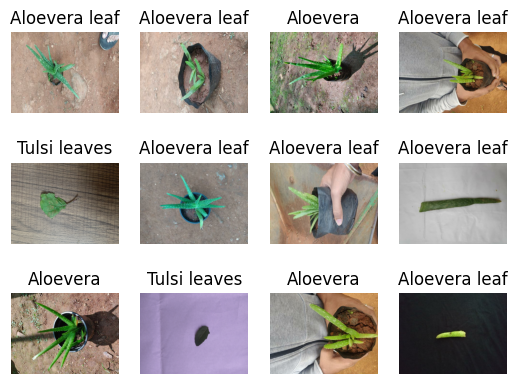

In [10]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
#     print(image_batch[0].shape)

In [11]:
train_percentage = 0.8
validation_percentage = 0.1
test_percentage = 0.1

#80% ==> training
#20% ==> 10% Validation, 10% test

In [12]:
len(dataset)*train_percentage

16.0

In [14]:
train_ds=dataset.take(16)
len(train_ds)

16

In [15]:
test_ds=dataset.skip(16)
len(test_ds)

4

In [16]:
validation_percentage = 0.1
len(dataset)*validation_percentage 

2.0

In [17]:
val_ds=test_ds.take(2)
len(val_ds)

2

In [18]:
test_ds=test_ds.skip(2)
len(test_ds)

2

In [19]:
def get_dataset_partitions_tf(ds,train_split=0.6,val_split=0.2,test_split=0.2,shuffle=True,shuffle_size=5000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [20]:
train_ds,val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

12

In [22]:
len(val_ds)

4

In [23]:
len(test_ds)

4

In [24]:
train_ds = train_ds.cache().shuffle (1000). prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle (1000). prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle (1000). prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size1),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing. RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing. RandomRotation(0.2),
])

**CNN**

In [27]:
input_shape = (Batch_size, Image_size, Image_size1, Channels)
n_classes = 3

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 450, 600, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 450, 600, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 448, 598, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 224, 299, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 222, 297, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 111, 148, 64)        0         
 g2D)                                                 

In [29]:
model.compile(
   optimizer= 'adam',
   loss= tf.keras.losses.SparseCategoricalCrossentropy (from_logits=False),
   metrics=['accuracy']
)

In [30]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
12/12 [==============================] - 548s 44s/step - loss: 1.1185 - accuracy: 0.4141 - val_loss: 1.0934 - val_accuracy: 0.3906
Epoch 2/50
12/12 [==============================] - 527s 44s/step - loss: 1.0889 - accuracy: 0.4349 - val_loss: 1.0910 - val_accuracy: 0.3906
Epoch 3/50
12/12 [==============================] - 1052s 92s/step - loss: 1.0778 - accuracy: 0.4349 - val_loss: 1.0927 - val_accuracy: 0.3906
Epoch 4/50
12/12 [==============================] - 502s 42s/step - loss: 1.0707 - accuracy: 0.4349 - val_loss: 1.0684 - val_accuracy: 0.4141
Epoch 5/50
12/12 [==============================] - 1061s 93s/step - loss: 1.0439 - accuracy: 0.4792 - val_loss: 0.9801 - val_accuracy: 0.5078
Epoch 6/50
12/12 [==============================] - 601s 50s/step - loss: 1.0026 - accuracy: 0.4844 - val_loss: 1.0135 - val_accuracy: 0.4453
Epoch 7/50
12/12 [==============================] - 600s 50s/step - loss: 1.0054 - accuracy: 0.4766 - val_loss: 0.9590 - val_accuracy: 0.4453
Epoc

In [31]:
scores=model.evaluate(test_ds)

4/4 [==============================] - 52s 4s/step - loss: 0.4545 - accuracy: 0.6981


In [32]:
scores

[0.4544781446456909, 0.698113203048706]

In [33]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 12}

In [37]:
len(history.history['accuracy'])

50

In [35]:
history.history['accuracy']

[0.4140625,
 0.4348958432674408,
 0.4348958432674408,
 0.4348958432674408,
 0.4791666567325592,
 0.484375,
 0.4765625,
 0.4869791567325592,
 0.4869791567325592,
 0.5546875,
 0.5807291865348816,
 0.6223958134651184,
 0.609375,
 0.703125,
 0.7291666865348816,
 0.71875,
 0.7473958134651184,
 0.7369791865348816,
 0.7135416865348816,
 0.7239583134651184,
 0.7317708134651184,
 0.7630208134651184,
 0.7083333134651184,
 0.75,
 0.7630208134651184,
 0.7395833134651184,
 0.7578125,
 0.7682291865348816,
 0.7421875,
 0.7473958134651184,
 0.7578125,
 0.7421875,
 0.7421875,
 0.7447916865348816,
 0.7604166865348816,
 0.765625,
 0.7734375,
 0.7838541865348816,
 0.7734375,
 0.7708333134651184,
 0.7760416865348816,
 0.7447916865348816,
 0.7552083134651184,
 0.7369791865348816,
 0.7864583134651184,
 0.765625,
 0.7786458134651184,
 0.7421875,
 0.7916666865348816,
 0.7838541865348816]

In [36]:
#the last one will show the maximum accuracy

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

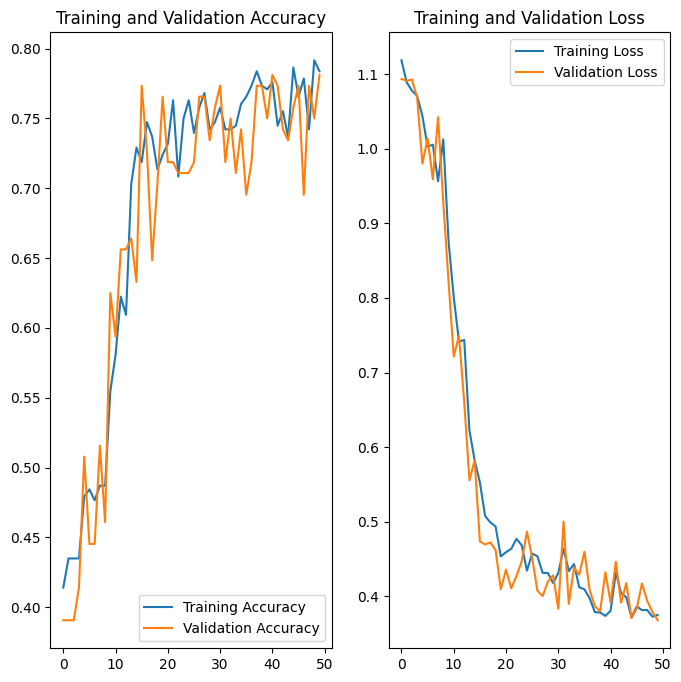

In [46]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)

plt.plot(range(EPOCHS), acc, label='Training Accuracy')

plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')

plt.legend (loc='lower right')

plt.title( 'Training and Validation Accuracy')



plt.subplot(1, 2, 2)

plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')

plt.legend(loc='upper right')

plt.title('Training and Validation Loss')

plt.show()

In [47]:
# in the tensorflow fromat
for images_batch,labels_batch in test_ds.take(1):
    print(image_batch[0])

tf.Tensor(
[[[185.       158.       131.      ]
  [190.       163.       136.      ]
  [188.       161.       134.      ]
  ...
  [110.       141.       146.      ]
  [111.       142.       147.      ]
  [112.       143.       148.      ]]

 [[182.34     155.34     128.34    ]
  [190.       163.       136.      ]
  [190.66     163.66     136.66    ]
  ...
  [108.22667  140.11333  146.      ]
  [109.22667  141.11333  147.      ]
  [109.78333  141.67     147.55667 ]]

 [[179.50555  152.50555  125.505554]
  [189.92778  162.92778  135.92778 ]
  [193.78334  166.78334  139.78334 ]
  ...
  [106.93889  140.15555  147.51666 ]
  [107.86667  141.08333  148.44444 ]
  [107.79444  141.01111  148.37222 ]]

 ...

 [[181.91693  160.77252  141.84473 ]
  [188.42236  167.27795  148.35016 ]
  [192.78339  169.78339  151.78339 ]
  ...
  [159.78339  123.78339  101.78339 ]
  [148.78339  112.71118   90.927795]
  [140.0722   104.072205  82.072205]]

 [[191.90674  170.90674  151.90674 ]
  [193.45337  172.45337  1

In [49]:
# in the numpy fromat
for images_batch,labels_batch in test_ds.take(1):
    print(image_batch[0].numpy())

[[[185.       158.       131.      ]
  [190.       163.       136.      ]
  [188.       161.       134.      ]
  ...
  [110.       141.       146.      ]
  [111.       142.       147.      ]
  [112.       143.       148.      ]]

 [[182.34     155.34     128.34    ]
  [190.       163.       136.      ]
  [190.66     163.66     136.66    ]
  ...
  [108.22667  140.11333  146.      ]
  [109.22667  141.11333  147.      ]
  [109.78333  141.67     147.55667 ]]

 [[179.50555  152.50555  125.505554]
  [189.92778  162.92778  135.92778 ]
  [193.78334  166.78334  139.78334 ]
  ...
  [106.93889  140.15555  147.51666 ]
  [107.86667  141.08333  148.44444 ]
  [107.79444  141.01111  148.37222 ]]

 ...

 [[181.91693  160.77252  141.84473 ]
  [188.42236  167.27795  148.35016 ]
  [192.78339  169.78339  151.78339 ]
  ...
  [159.78339  123.78339  101.78339 ]
  [148.78339  112.71118   90.927795]
  [140.0722   104.072205  82.072205]]

 [[191.90674  170.90674  151.90674 ]
  [193.45337  172.45337  153.45337 ]


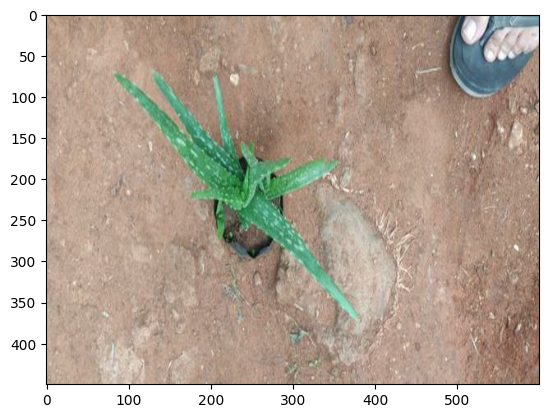

In [51]:
for images_batch,labels_batch in test_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))


In [59]:
import numpy as np
np.argmax([8.7430969e-02, 9.1256899e-01 ,2.1541963e-08])

1

first image to predict


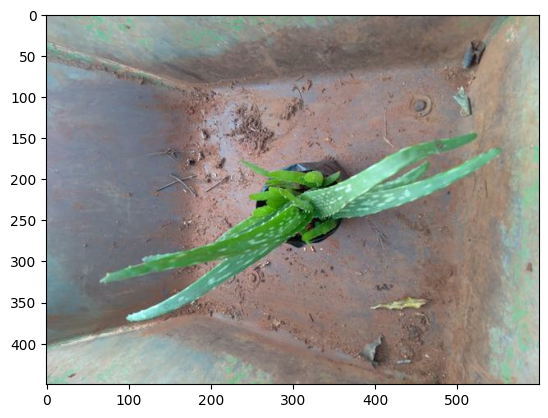

first image's actual label:  Aloevera
1/1 [==============================] - 1s 1s/step
[8.7430969e-02 9.1256899e-01 2.1541963e-08]
predicted label: Aloevera leaf


In [60]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')  # Added missing '='
    first_label = labels_batch[0].numpy()

    print("first image to predict")

    plt.imshow(first_image)
    plt.show()  # Added plt.show() to display the image

    print("first image's actual label: ", class_names[first_label])
    
    batch_prediction=model.predict(images_batch)#size of the batch predicted
    print(batch_prediction[0])
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [68]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())  # Fixed variable name 'images' to 'img'

    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]  # Assuming 'class_names' is defined somewhere

    confidence = round(100 * np.max(predictions[0]), 2)  # Added '*' to fix the syntax

    return predicted_class, confidence

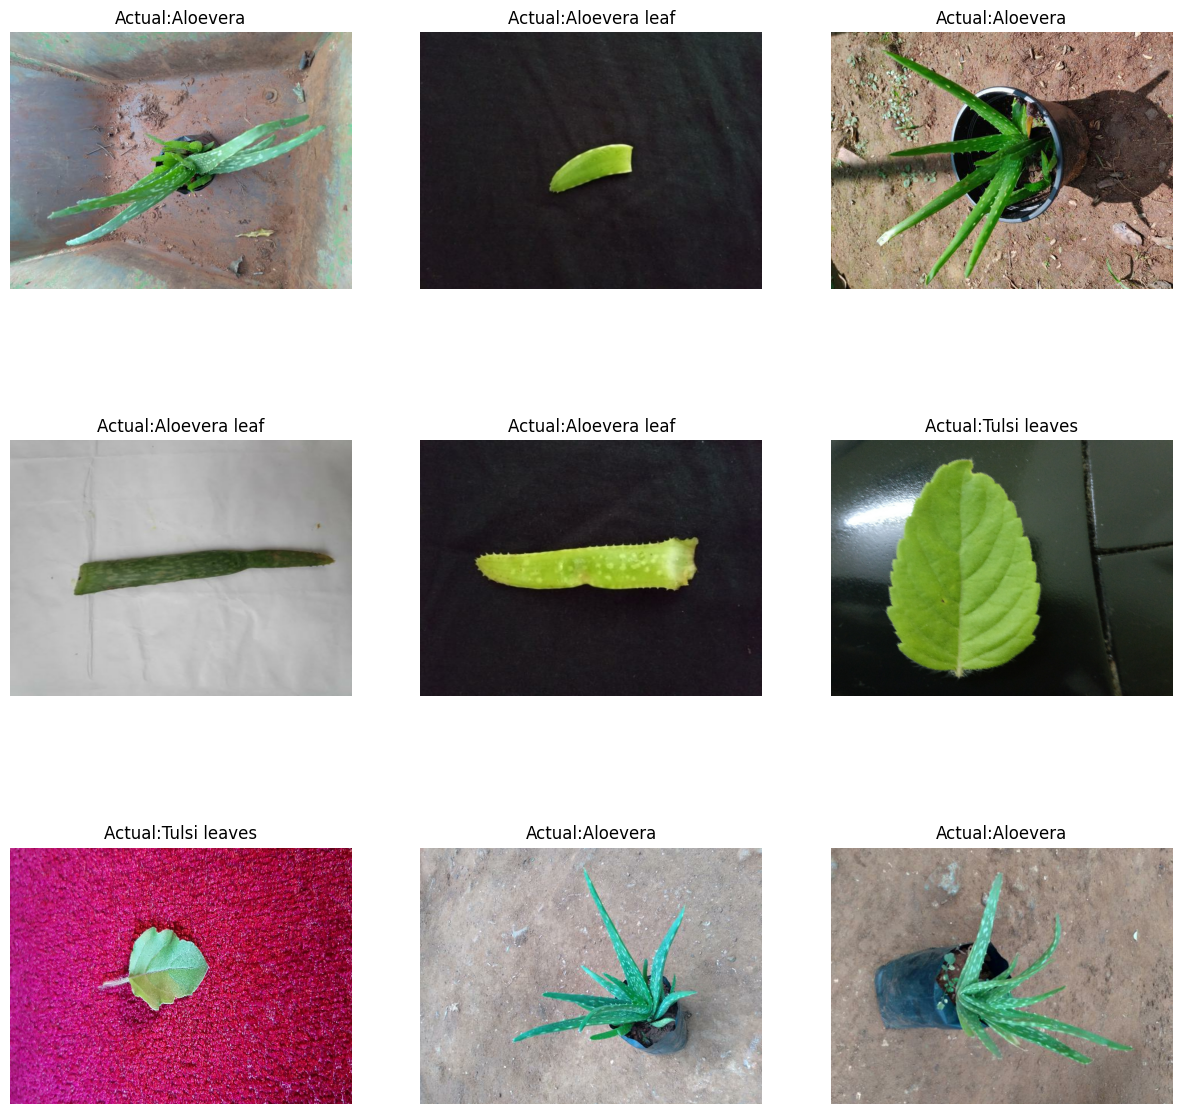

In [82]:
plt.figure(figsize=(15,15))#denotes how big is the size of the image
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class}")
        
        plt.axis('off')


In [85]:
model_version=1
model.save(f"../models/{model_version}")

#as if we want to create more variables of the model , we have to
#increase the version of the model


INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
